![Python Programming for Scientists in a hurry](fig/Title_Python.png)

<div style="clear: both; display: table;">
  <div style="border: none; float: left; width: 60%; padding: 5px">
  <h1 id="subtitle">Chapter 3. Scientific Packages</h1>
  <h2 id="subtitle">Guillermo Avendaño Franco<br>Aldo Humberto Romero</h2>
  <br>
  <img src="fig/1-line logotype124-295.png" alt="Scientific Computing with Python" style="width:50%" align="left">
  </div>
  <div style="border: none; float: left; width: 30%; padding: 5px">
  <img src="fig/SCPython.png" alt="Scientific Computing with Python" style="width:100%">
  </div>
</div>

## List of Notebooks

Python is a great general-purpose programming language on its own.
Python is a general purpose programming language. It is interpreted and dynamically typed and is very suited for interactive work and quick prototyping while being powerful enough to write large applications in.
The lesson is particularly oriented to Scientific Computing. 
Other episodes in the series include:

  * Language Syntax
  * Standard Library
  * **Scientific Packages \[This notebook\]**
  * NumPy
  * Matplotlib
  * SciPy 
  * Pandas
  * Cython
  * Parallel Computing

After completing all the series in this lesson you will realize that python has become a powerful environment for scientific computing at several levels, from interactive computing to scripting to big project developments.

## Setup

In [1]:
%load_ext watermark

In [2]:
%watermark

Last updated: 2024-07-25T17:33:13.683604-04:00

Python implementation: CPython
Python version       : 3.11.7
IPython version      : 8.14.0

Compiler    : Clang 12.0.0 (clang-1200.0.32.29)
OS          : Darwin
Release     : 20.6.0
Machine     : x86_64
Processor   : i386
CPU cores   : 8
Architecture: 64bit



In [3]:
import time
start = time.time()
chapter_number = 3
import matplotlib
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
%watermark -iv

numpy     : 1.26.2
matplotlib: 3.8.2



# Scientific Packages

# Table of Contents

In this notebook we explore:

 1. [Scientific Packages](#python_scientific_packages)
     1. Numpy
     1. SciPy
     1. Matplotlib
     1. SymPy
     1. Pandas
 

<a id="python_scientific_packages"></a>
# Brief exploration of other scientific packages for Python

## Numpy

Now we will test if NumPy is working on your system

In [6]:
import numpy as np

If you get an error in the previous input, NumPy is not installed on your system. The next inputs will fail also

Those are the Pauli matrices:

In [7]:
sigmax=np.array([ [0, 1], [1, 0] ], dtype=complex)
sigmax

array([[0.+0.j, 1.+0.j],
       [1.+0.j, 0.+0.j]])

In [8]:
sigmay=np.array([ [0, -1j], [1j, 0] ], dtype=complex)
sigmay

array([[ 0.+0.j, -0.-1.j],
       [ 0.+1.j,  0.+0.j]])

In [9]:
sigmaz=np.array([ [1, 0], [0, -1] ], dtype=complex)
sigmaz

array([[ 1.+0.j,  0.+0.j],
       [ 0.+0.j, -1.+0.j]])

This shows the involuntary property of Pauli matrices

In [10]:
-1j* np.dot( sigmax, np.dot(sigmay, sigmaz))

array([[1.-0.j, 0.-0.j],
       [0.-0.j, 1.-0.j]])

This shows how to produce the Identity matrix with complex entries

In [11]:
np.eye(2, dtype=complex)

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j]])

These are the rotation matrices in $\mathbb{R}^3$

In [12]:
from math import cos, sin, radians
def Rotation(alpha, beta, gamma):
    a=radians(alpha)
    b=radians(beta)
    c=radians(gamma)
    Rx=np.array([[1, 0, 0],[0, cos(a), -sin(a)],[0, sin(a), cos(a)]])
    Ry=np.array([[cos(b),0,sin(beta)],[0, 1, 0],[-sin(b), 0, cos(b)]])
    Rz=np.array([[cos(c), -sin(c), 0],[sin(c), cos(c), 0],[0, 0, 1]])
    return Rx, Ry, Rz

In [13]:
np.set_printoptions(precision=3,suppress=True)
Rotation(0,0,90)

(array([[ 1.,  0.,  0.],
        [ 0.,  1., -0.],
        [ 0.,  0.,  1.]]),
 array([[ 1.,  0.,  0.],
        [ 0.,  1.,  0.],
        [-0.,  0.,  1.]]),
 array([[ 0., -1.,  0.],
        [ 1.,  0.,  0.],
        [ 0.,  0.,  1.]]))

This shows that rotations form a group, the so call Special Orthogonal Group $SO(3)$

In [14]:
Rx,Ry,Rz=Rotation(45,45,0)
print(Rx)
print(Ry)
print(Rz)

[[ 1.     0.     0.   ]
 [ 0.     0.707 -0.707]
 [ 0.     0.707  0.707]]
[[ 0.707  0.     0.851]
 [ 0.     1.     0.   ]
 [-0.707  0.     0.707]]
[[ 1. -0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


Notice that rotating 45 degrees about the y axis followed by a rotation of 45 degrees about the x-axis does not produce the same matrix or same rotation, that operating in the inverse order.
Matrix multiplication and rotations do not commute. The _np.dot()_ is used to multiply matrices.

In [15]:
np.dot(Rx,Ry)

array([[ 0.707,  0.   ,  0.851],
       [ 0.5  ,  0.707, -0.5  ],
       [-0.5  ,  0.707,  0.5  ]])

In [16]:
np.dot(Ry,Rx)

array([[ 0.707,  0.602,  0.602],
       [ 0.   ,  0.707, -0.707],
       [-0.707,  0.5  ,  0.5  ]])

## Scipy

We start importing the Bessel function of the first kind of real order v: $J_v(\rho)$. We also need to import the RBF class for radial basis function interpolation of n-dimensional scattered data.

In [17]:
from scipy.interpolate import Rbf
from scipy.special import jn
from math import pi

Here we create our random sampling of data. The "Sombrero" function is defined as $2 J_1(\pi \rho)/(\pi \rho)$. This function is very used in optics and image processing. Let's try to see if the RBF algorithm can capture the small waves of the "Sobrero".

In [18]:
x = np.random.rand(100)*8.0-4.0
y = np.random.rand(100)*8.0-4.0
rho = np.sqrt(x**2 + y**2)
z = 2 * jn(1,pi*rho)/(pi*rho)
tx = np.linspace(-4.0, 4.0, 100)
ty = np.linspace(-4.0, 4.0, 100)
XI, YI = np.meshgrid(tx, ty)

Now, we have the sampled data and a mesh grid to work with. The class Rbf returns a callable that we use to fill the interpolated values in the ZI array

In [19]:
rbf = Rbf(x, y, z, epsilon=2)
ZI = rbf(XI, YI)

We can use this interpolated data for visualization. Matplotlib is the standard "de facto" for plotting

## Matplotlib

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm

Now plot the interpolated mesh

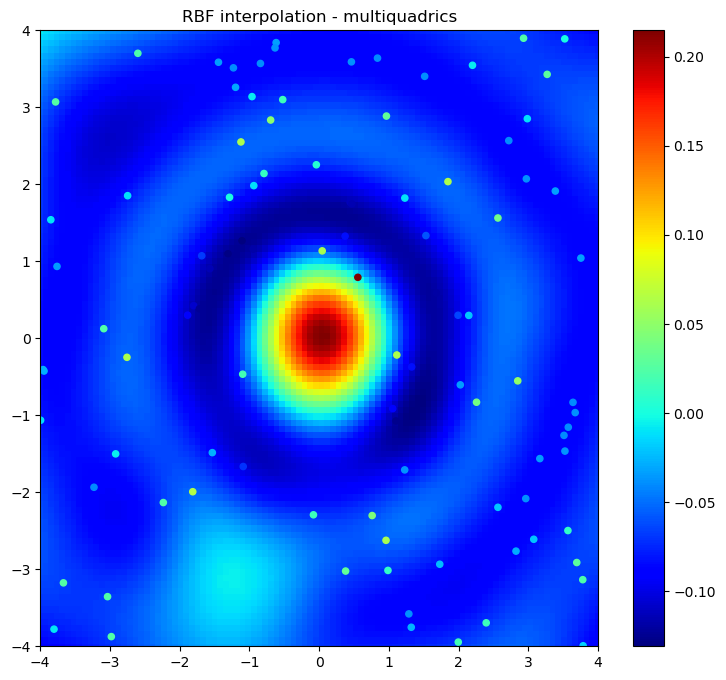

In [21]:
fig=plt.figure(figsize=(9, 8))
#n = plt.normalize(-1., 1.)
plt.subplot(1, 1, 1)
plt.pcolor(XI, YI, ZI, cmap=cm.jet)
plt.scatter(x, y, 20, z, cmap=cm.jet)
plt.title('RBF interpolation - multiquadrics')
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.colorbar();

Notice that the Rbf algorithm was able to capture, even if not completely the first and second ring in the "Sombrero" function.
We can try now to plot the surface of the function using also Matplotlib

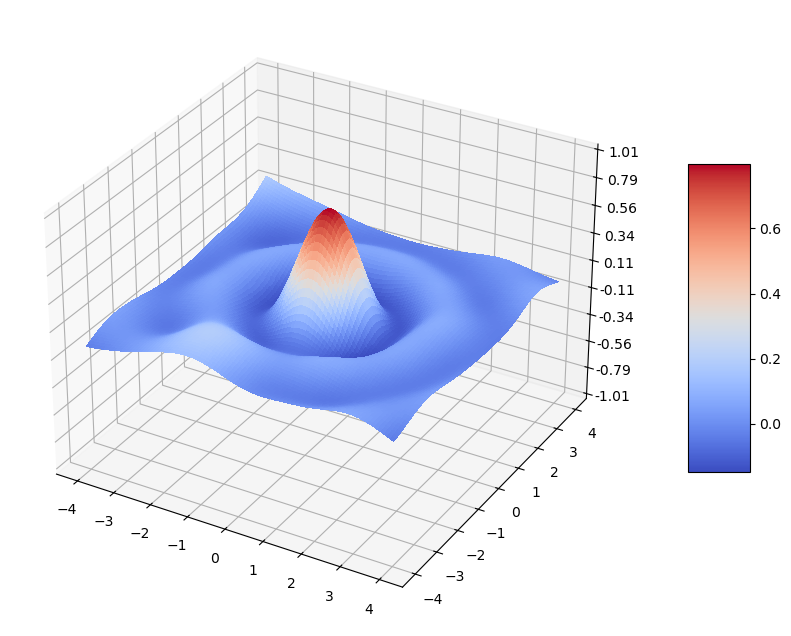

In [22]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator
from matplotlib.ticker import FormatStrFormatter

fig = plt.figure(figsize=(16,8))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(XI, YI, ZI, rstride=1, cstride=1, cmap=cm.coolwarm,
        linewidth=0, antialiased=False)

ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

## SymPy

This is a library for symbolic math, different from most of the libraries presented until now that are numeric. Let's do some simple examples to see how SymPy works.
This is one of the libraries that you have not installed. If you are not interested in computer algebra, just move on to the next library. 

In [23]:
#%load_ext sympyprinting
import sympy as sym
from sympy import init_printing
init_printing()

ModuleNotFoundError: No module named 'sympy'

In [ ]:
# Deprecated
#sym.interactive.ipythonprinting

We will inform Sympy that treat 'x', 'y', 'z' and 't' as symbols. 

In [ ]:
x, y, z, t = sym.symbols('x y z t')

Equality is given by the function Eq, not by '=' (or ':=')

In [ ]:
sym.Eq(x,y)

The imaginary unit is I, not 1j like used to be in Python 

In [ ]:
sym.Rational(3,2)*sym.pi + sym.exp(sym.I*x) / (x**2 + y)

In [ ]:
eq = ((x+y)**3 * (x+1))
eq

In [ ]:
sym.expand(eq)

Let's try to solve a differential equation, we start defining two symbols that are functions

In [ ]:
f, g = sym.symbols('f g', cls=sym.Function)

Now a differential equation for $f(x)$ could be defined as: 

In [ ]:
diffeq = sym.Eq(f(x).diff(x, x) - 2*f(x).diff(x) + f(x), sym.sin(x))
diffeq

In [ ]:
sym.dsolve(diffeq, f(x))

As expected, there are two arbitrary constants in the solution to the differential equation above

#### IMPORTING DATA

In [ ]:
import csv

%precision 2

with open('./data/heart.csv') as cvsfile:
    myfile=list(csv.DictReader(cvsfile))
    
print(myfile[:3])

ll=sum([float(d['sex']) for d in myfile])
print('Sum over the column = ',ll)

## Pandas

Pandas is the last library that we will test in for the introduction. Pandas is a library for Data Analysis, it is robust enough to support data from CSV, 

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_excel('./data/2018_all_indicators.xlsx')

In [ ]:
df.columns

In [ ]:
df['iso3'].unique()

In [ ]:
df['country_name'].unique()

In [ ]:
df.loc[df['iso3']=='MEX']

In [ ]:
mex=df.loc[df['iso3']=='MEX'][['indicator_name']+list(range(1990,2018))]

In [ ]:
mex_t=mex.dropna().transpose()
mex_t

In [ ]:
mex_t.index

In [ ]:
mex_t.columns=mex_t.iloc[0]
df=mex_t.reindex(mex_t.index.drop('indicator_name'))
df

In [ ]:
edu_cols=[x for x in df.columns if 'schooling' in x ]
edu_cols

In [ ]:
df.plot.line(y=edu_cols,figsize=(16,8));

In [ ]:
gdp_cols=[x for x in df.columns if 'GDP' in x ]
gdp_cols

In [ ]:
df.plot.line(y=gdp_cols,figsize=(16,8));

# Acknowledgments and References

This Notebook has been adapted by **Guillermo Avendaño** (WVU), **Jose Rogan** (Universidad de Chile) and **Aldo Humberto Romero** (WVU) from the [Tutorials for Stanford cs228 and cs231n](https://github.com/kuleshov/cs228-material). A large part of the info was also built from scratch. In turn, that material was adapted by [Volodymyr Kuleshov](http://web.stanford.edu/~kuleshov/) and [Isaac Caswell](https://symsys.stanford.edu/viewing/symsysaffiliate/21335) from the `CS231n` Python tutorial by Justin Johnson (http://cs231n.github.io/python-numpy-tutorial/). Another good resource, in particular, if you want to just look for an answer to specific questions is [planetpython.org](http:planetpython.org), in particular for data science.

Changes to the original tutorial include strict Python 3 formats and a split of the material to fit a series of lessons on Python Programming for WVU's faculty and graduate students.

The support of the National Science Foundation and the US Department of Energy under projects: DMREF-NSF 1434897, NSF OAC-1740111 and DOE DE-SC0016176 is recognized.

<div style="clear: both; display: table;">
<div style="border: none; float: left; width: 40%; padding: 10px">
<img src="fig/NSF.jpg" alt="National Science Foundation" style="width:50%" align="left">
    </div>
    <div style="border: none; float: right; width: 40%; padding: 10px">
<img src="fig/DOE.jpg" alt="National Science Foundation" style="width:50%" align="right">
</div>

# Back of the Book

In [ ]:
plt.figure(figsize=(3,3))
n = chapter_number
maxt=(2*(n-1)+3)*np.pi/2
t = np.linspace(np.pi/2, maxt, 1000)
tt= 1.0/(t+0.01)
x = (maxt-t)*np.cos(t)**3
y = t*np.sqrt(np.abs(np.cos(t))) + np.sin(0.3*t)*np.cos(2*t)
plt.plot(x, y, c="green")
plt.axis('off');

In [ ]:
end = time.time()
print(f'Chapter {chapter_number} run in {int(end - start):d} seconds')